来源书籍：Natural-Language-Processing-with-TensorFlow

## 导入库

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import logging
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger("tensorflow").setLevel(logging.ERROR)

## 通过placeholder传递输入
sigmoid实例

In [11]:
# 定义graph和session
graph = tf.Graph() # 创建图
session = tf.InteractiveSession(graph=graph) # 创建会话

# 构建图
# 创建占位符placeholder
x=tf.placeholder(shape=[1,10],dtype=tf.float32,name='x')
# 变量 W
W=tf.Variable(tf.random_uniform(shape=[10,5],minval=-0.1,maxval=0.1,dtype=tf.float32),name='W')
# 变量 b
b=tf.Variable(tf.zeros(shape=[5],dtype=tf.float32),name='b')

h=tf.nn.sigmoid(tf.matmul(x,W)+b) # sigmoid运算
#
tf.global_variables_initializer().run() # 初始化全局变量

# 传给x值
h_eval=session.run(h,feed_dict={x:np.random.rand(1,10)})
print(h_eval)
session.close()

[[0.4941275  0.51278746 0.49341637 0.5056394  0.50781184]]


## 通过TensorFlow 张量传递输入

In [10]:
# 定义图
graph=tf.Graph()
session=tf.InteractiveSession(graph=graph)

# 构建图

# 声明x并赋值,
x=tf.constant(value=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]],dtype=tf.float32,name='x')

# 变量 W
W=tf.Variable(tf.random_uniform(shape=[10,5],minval=-0.1,maxval=0.1,dtype=tf.float32),name='W')
# 变量 b
b=tf.Variable(tf.zeros(shape=[5],dtype=tf.float32),name='b')

h=tf.nn.sigmoid(tf.matmul(x,W)+b) # 计算

# 初始化变量
tf.global_variables_initializer().run()

# 直接计算
h_eval=session.run(h)
print(h_eval)

# 关闭会话
session.close()

[[0.5038708  0.51638865 0.48006743 0.49199152 0.461249  ]]


## 定义TensorFlow操作

### 比较操作

In [15]:
graph=tf.Graph()
session=tf.InteractiveSession()


x=tf.constant([[1,2],[3,4]],dtype=tf.float32)
y=tf.constant([[4,3],[3,2]],dtype=tf.float32)

# 是否相等
x_equal_y=tf.equal(x,y,name="x_y_equalop")
print("x_equal_y:\n",session.run(x_equal_y))

# 是否小于
x_less_y=tf.less(x,y,name='x_less_y')
print("x_less_y:\n",session.run(x_less_y))

# 是否大于等于
x_great_equal_y=tf.greater_equal(x,y,name="x_great_equal_y")
print("x_great_equal_y\n",session.run(x_great_equal_y))

# 根据条件选取数据
# 从x选取数据，不满足则从y中抽取数据
condition=tf.constant([[True,False],[True,False]],dtype=tf.bool)
x_cond_y=tf.where(condition,x,y,name='x_cond_y')
print("x_cond_y\n",session.run(x_cond_y))


x_equal_y:
 [[False False]
 [ True False]]
x_less_y:
 [[ True  True]
 [False False]]
x_great_equal_y
 [[False False]
 [ True  True]]
x_cond_y
 [[1. 3.]
 [3. 2.]]


## 创建 Tensorflow Pipeline

In [14]:
# 定义图和会话
graph=tf.Graph()
session=tf.InteractiveSession(graph=graph)

# 文件
filenames=['data/19/test%d.txt' %i for i in range(1,4)]
filename_queue=tf.train.string_input_producer(filenames,capacity=3,shuffle=True,name='string_input_producer')

In [15]:
# 检查文件是否存在
for f in filenames:
    if not tf.gfile.Exists(f):
        raise ValueError('Failed to find file: ' + f)
    else:
        print('File %s found.'%f)

File data/19/test1.txt found.
File data/19/test2.txt found.
File data/19/test3.txt found.


In [18]:
reader=tf.TextLineReader()
key, value = reader.read(filename_queue, name='text_read_op')

# 默认值
record_defaults = [[-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0]]
col1, col2, col3, col4, col5, col6, col7, col8, col9, col10 = tf.decode_csv(value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3, col4, col5, col6, col7, col8, col9, col10])

x = tf.train.shuffle_batch([features], batch_size=3,
                           capacity=5, name='data_batch', 
                           min_after_dequeue=1,num_threads=1)

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=session)

In [21]:
W = tf.Variable(tf.random_uniform(shape=[10,5], minval=-0.1, maxval=0.1, dtype=tf.float32),name='W') 
b = tf.Variable(tf.zeros(shape=[5],dtype=tf.float32),name='b') 
h = tf.nn.sigmoid(tf.matmul(x,W) + b)
tf.global_variables_initializer().run()
for step in range(5):
    x_eval, h_eval = session.run([x,h]) 
    print('========== Step %d =========='%step)
    print('Evaluated data (x)')
    print(x_eval)
    print('Evaluated data (h)')
    print(h_eval)
    print('')

coord.request_stop()
coord.join(threads)
session.close()

========== Step 0 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Evaluated data (h)
[[0.5049817  0.49255627 0.5058895  0.50510323 0.50227076]
 [0.5049817  0.49255627 0.5058895  0.50510323 0.5022707 ]
 [0.50498176 0.4925563  0.5058895  0.50510323 0.5022707 ]]

========== Step 1 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Evaluated data (h)
[[0.5049817  0.49255627 0.5058895  0.50510323 0.50227076]
 [0.5438934  0.44402477 0.5267701  0.5240376  0.50090057]
 [0.50498176 0.4925563  0.5058895  0.50510323 0.5022707 ]]

========== Step 2 ==========
Evaluated data (x)
[[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]]
Evaluated data (h)
[[0.5438934  0.44402477 0.5267701  0.52403754 0.50090057]

## TF实现损失函数
- MSE
- Cross Entropy Loss

In [25]:
# 定义图和会话
graph=tf.Graph()
session=tf.InteractiveSession(graph=graph)

x=tf.constant([[2,4],[6,8]],dtype=tf.float32)
x_hat=tf.constant([[3,5],[7,9]],dtype=tf.float32)
# MSE=（1**2+1**2+1**2+1**2）/2
MSE=tf.nn.l2_loss(x_hat-x)

# cross_entropy with logits 
y=tf.constant([[1,0],[0,1]],dtype=tf.float32)
y_hat=tf.constant([[3,1],[2,5]],dtype=tf.float32)

CE=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat,labels=y))

print('MSE Loss: ',session.run(MSE))
print('CE Loss: ',session.run(CE))
session.close()

MSE Loss:  2.0
CE Loss:  0.08775769


## 实现第一个神经网络

### 下载数据

In [22]:
import struct
import gzip
import os
from six.moves.urllib.request import urlretrieve

def maybe_download(url, filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename


def read_mnist(fname_img, fname_lbl):
    print('\nReading files %s and %s'%(fname_img, fname_lbl))
    
    with gzip.open(fname_img) as fimg:        
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        print(num,rows,cols)
        img = (np.frombuffer(fimg.read(num*rows*cols), dtype=np.uint8).reshape(num, rows * cols)).astype(np.float32)
        print('(Images) Returned a tensor of shape ',img.shape)
        
        img = (img - np.mean(img))/np.std(img)
        
    with gzip.open(fname_lbl) as flbl:
        # flbl.read(8) reads upto 8 bytes
        magic, num = struct.unpack(">II", flbl.read(8))        
        lbl = np.frombuffer(flbl.read(num), dtype=np.int8)
        print('(Labels) Returned a tensor of shape: %s'%lbl.shape)
        print('Sample labels: ',lbl[:10])
        
    return img, lbl
    
    
# Download data if needed
url = 'http://yann.lecun.com/exdb/mnist/'
# training data
maybe_download(url,'data/19/train-images-idx3-ubyte.gz',9912422)
maybe_download(url,'data/19/train-labels-idx1-ubyte.gz',28881)
# testing data
maybe_download(url,'data/19/t10k-images-idx3-ubyte.gz',1648877)
maybe_download(url,'data/19/t10k-labels-idx1-ubyte.gz',4542)

# Read the training and testing data 
train_inputs, train_labels = read_mnist('data/19/train-images-idx3-ubyte.gz', 'data/19/train-labels-idx1-ubyte.gz')
test_inputs, test_labels = read_mnist('data/19/t10k-images-idx3-ubyte.gz', 'data/19/t10k-labels-idx1-ubyte.gz')

Found and verified data/19/train-images-idx3-ubyte.gz
Found and verified data/19/train-labels-idx1-ubyte.gz
Found and verified data/19/t10k-images-idx3-ubyte.gz
Found and verified data/19/t10k-labels-idx1-ubyte.gz

Reading files data/19/train-images-idx3-ubyte.gz and data/19/train-labels-idx1-ubyte.gz
60000 28 28
(Images) Returned a tensor of shape  (60000, 784)
(Labels) Returned a tensor of shape: 60000
Sample labels:  [5 0 4 1 9 2 1 3 1 4]

Reading files data/19/t10k-images-idx3-ubyte.gz and data/19/t10k-labels-idx1-ubyte.gz
10000 28 28
(Images) Returned a tensor of shape  (10000, 784)
(Labels) Returned a tensor of shape: 10000
Sample labels:  [7 2 1 0 4 1 4 9 5 9]


### 定义参数

In [35]:
batch_size=100
img_width,img_height=28,28
input_size=img_width*img_height
num_labels=10
tf.reset_default_graph()

### 定义输入和输出占位符

In [36]:
tf_inputs=tf.placeholder(shape=[batch_size,input_size],dtype=tf.float32,name="inputs")
tf_labels=tf.placeholder(shape=[batch_size,num_labels],dtype=tf.float32,name="lables")

## 定义weights和bias变量

In [37]:
def define_net_parameters():
    with tf.variable_scope('layer1'):
        tf.get_variable('weights',shape=[input_size,500],
                        initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable('bias', shape=[500],
                           initializer=tf.random_uniform_initializer(0,0.01))
        
    with tf.variable_scope('layer2'):
        tf.get_variable('weights',shape=[500,250],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable('bias', shape=[250],
                           initializer=tf.random_uniform_initializer(0,0.01))
    
    with tf.variable_scope('output'):
        tf.get_variable('weights',shape=[250,10],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable('bias', shape=[10],
                           initializer=tf.random_uniform_initializer(0,0.01))

### 定义inference操作

In [38]:
def inference(x):
    # calculations for layer 1
    with tf.variable_scope('layer1',reuse=True):
        w,b = tf.get_variable('weights'), tf.get_variable('bias')
        tf_h1 = tf.nn.relu(tf.matmul(x,w) + b, name = 'hidden1')

    # calculations for layer 2
    with tf.variable_scope('layer2',reuse=True):
        w,b = tf.get_variable('weights'), tf.get_variable('bias')
        tf_h2 = tf.nn.relu(tf.matmul(tf_h1,w) + b, name = 'hidden1')

    # calculations for output layer
    with tf.variable_scope('output',reuse=True):
        w,b = tf.get_variable('weights'), tf.get_variable('bias')
        tf_logits = tf.nn.bias_add(tf.matmul(tf_h2,w), b, name = 'logits')

    return tf_logits

### 定义loss和optimizer

In [39]:
define_net_parameters()

# defining the loss
tf_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=inference(tf_inputs), labels=tf_labels))

# defining the optimize function
tf_loss_minimize = tf.train.MomentumOptimizer(momentum=0.9,learning_rate=0.01).minimize(tf_loss)

### 定义预测

In [40]:
# defining predictions
tf_predictions = tf.nn.softmax(inference(tf_inputs))

### 训练

In [41]:
session = tf.InteractiveSession()

tf.global_variables_initializer().run()

NUM_EPOCHS = 50

def accuracy(predictions, labels):
    ''' Measure the classification accuracy of some predictions (softmax outputs) 
    and labels (integer class labels)'''
    return np.sum(np.argmax(predictions,axis=1).flatten()==labels.flatten())/batch_size

test_accuracy_over_time = []
train_loss_over_time = []
for epoch in range(NUM_EPOCHS):
    train_loss = []
    
    # Training Phase 
    for step in range(train_inputs.shape[0]//batch_size):
        # Creating one-hot encoded labels with labels
        # One-hot encoding dight 3 for 10-class MNIST data set will result in
        # [0,0,0,1,0,0,0,0,0,0]
        labels_one_hot = np.zeros((batch_size, num_labels),dtype=np.float32)
        labels_one_hot[np.arange(batch_size),train_labels[step*batch_size:(step+1)*batch_size]] = 1.0
        
        # Printing the one-hot labels
        if epoch ==0 and step==0:
            print('Sample labels (one-hot)')
            print(labels_one_hot[:10])
            print()
        
        # Running the optimization process
        loss, _ = session.run([tf_loss,tf_loss_minimize],feed_dict={
            tf_inputs: train_inputs[step*batch_size: (step+1)*batch_size,:],
            tf_labels: labels_one_hot}
                             )
        train_loss.append(loss) # Used to average the loss for a single epoch
        
    test_accuracy = []
    # Testing Phase
    for step in range(test_inputs.shape[0]//batch_size):
        test_predictions = session.run(tf_predictions,feed_dict={tf_inputs: test_inputs[step*batch_size: (step+1)*batch_size,:]})
        batch_test_accuracy = accuracy(test_predictions,test_labels[step*batch_size: (step+1)*batch_size])        
        test_accuracy.append(batch_test_accuracy)
    
    print('Average train loss for the %d epoch: %.3f\n'%(epoch+1,np.mean(train_loss)))
    train_loss_over_time.append(np.mean(train_loss))
    print('\tAverage test accuracy for the %d epoch: %.2f\n'%(epoch+1,np.mean(test_accuracy)*100.0))
    test_accuracy_over_time.append(np.mean(test_accuracy)*100)
    
session.close()

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Sample labels (one-hot)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Average train loss for the 1 epoch: 0.444

	Average test accuracy for the 1 epoch: 94.42

Average train loss for the 2 epoch: 0.139

	Average test accuracy for the 2 epoch: 96.08

Average train loss for the 3 epoch: 0.089

	Average test accuracy for the 3 epoch: 96.85

Average train loss for the 4 epoch: 0.063

	Average test accuracy for the 4 epoch: 97.22

Average train loss for the 5 epoch: 0.046

	Average test accuracy for the 5 epoch: 97.61

Average train loss for the 6 epoch: 0.034

	Average test accuracy for the 6 epoch: 97.72

Average train loss for the 7 epoch: 0.025

	Average test accuracy for the 7 epoch: 97.77

Average train 

### 可视化准确率

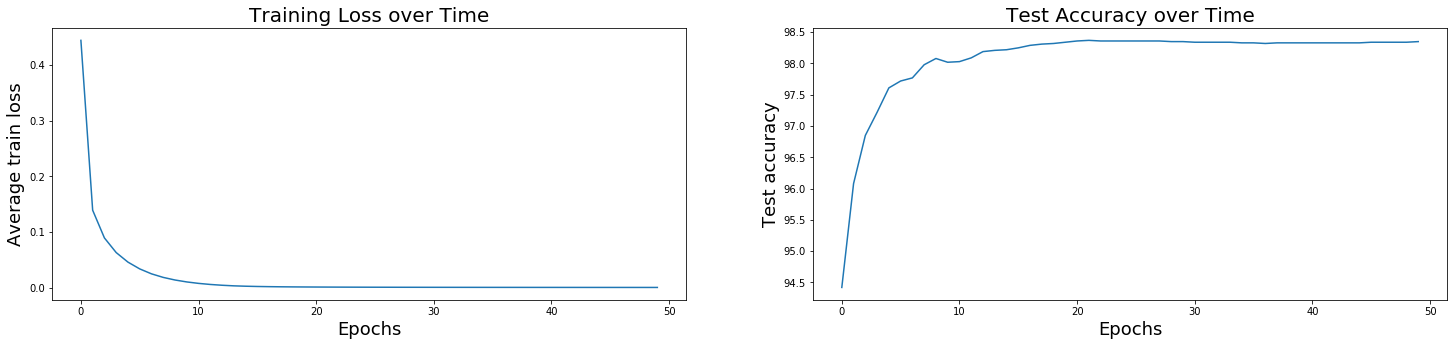

In [42]:
x_axis = np.arange(len(train_loss_over_time))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=25,h=5)
ax[0].plot(x_axis, train_loss_over_time)
ax[0].set_xlabel('Epochs',fontsize=18)
ax[0].set_ylabel('Average train loss',fontsize=18)
ax[0].set_title('Training Loss over Time',fontsize=20)
ax[1].plot(x_axis, test_accuracy_over_time)
ax[1].set_xlabel('Epochs',fontsize=18)
ax[1].set_ylabel('Test accuracy',fontsize=18)
ax[1].set_title('Test Accuracy over Time',fontsize=20)
fig.savefig('data/19/mnist_stats.jpg')